basic examples of sympy by manipulating polynomials

In [68]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt

Intro to Variables

In [69]:
from sympy.abc import x
#For one-letter symbolic variables, this another way to declare them
#Functionally equivalent to x = symbols('x')

In [70]:
#we can write a fourth power polynomial
polynomial = (2*x + 3)**4
#it outputs in the same format that we entered it.
polynomial

(2*x + 3)**4

In [71]:
#we can expand the polynomial to see the coefficients of each power:
poly_ex = polynomial.expand()
poly_ex

16*x**4 + 96*x**3 + 216*x**2 + 216*x + 81

In [72]:
#The reverse operational is also possible
poly_fct = poly_ex.factor()
poly_fct

(2*x + 3)**4

In [73]:
#you can use multiple variables, and find specify coefficients
y = symbols('y')
poly_xy = ((y-3)*((x+2)**2)).expand()
print(poly_xy)
print(poly_xy.coeff(x))
print(poly_xy.coeff(y))
print(poly_xy.coeff(x*y))

x**2*y - 3*x**2 + 4*x*y - 12*x + 4*y - 12
4*y - 12
x**2 + 4*x + 4
4


Equalities

In [74]:
#Sympy will recognize two expressions which are written in exactly the same way
#This is setting up and equation which sets to two equal to each other.
#the first term is the "left-hand-side" and the second term if the "right-hand-side"
Eq(polynomial,poly_fct)

True

In [75]:
#Sympy will not immediately recognze two expression written in different ways
Eq(poly_ex,poly_fct)
#however you can ask it to check
Eq(poly_ex,poly_fct).simplify()

True

In [76]:
#The same behavior will govern the == symbol
polynomial == poly_fct
poly_ex == poly_fct
#It's okay to use sympy expressions in inequalities, so long as your script has a way to handle false negatives.
#True means "inviable fact of the universe"
#False means "not been shown to be true"

False

Differntiation and Integration

In [77]:
#derivative with respect to x
poly_fct.diff(x)

8*(2*x + 3)**3

In [78]:
#integral with respect to x
integrate(poly_fct,x)
#note that integrate doesn't produce factors of integration (although dsolve does)

16*x**5/5 + 24*x**4 + 72*x**3 + 108*x**2 + 81*x

In [79]:
#can it factor that?
print(integrate(poly_fct,x).factor())
#since we only used integers in specifying the coefficients, it thinks we don't want messy factors
#compare what happens if we use floats in the equation
print(integrate((2.0*x + 3)**4,x).factor())
#factor is fairly limited though,
#if we want a precise analytical answer, use roots
roots(integrate(poly_fct,x))

x*(16*x**4 + 120*x**3 + 360*x**2 + 540*x + 405)/5
108.0*x*(0.0296296296296296*x**4 + 0.222222222222222*x**3 + 0.666666666666667*x**2 + 1.0*x + 0.75)


{-15/8 + 3*sqrt(5)/8 - 3*sqrt(-5/32 - sqrt(5)/32): 1,
 -15/8 - 3*sqrt(5)/8 - 3*sqrt(-5/32 + sqrt(5)/32): 1,
 -15/8 - 3*sqrt(5)/8 + 3*sqrt(-5/32 + sqrt(5)/32): 1,
 -15/8 + 3*sqrt(5)/8 + 3*sqrt(-5/32 - sqrt(5)/32): 1,
 0: 1}

Solving an Equation

In [80]:
#we can also ask sympy to solve an equation for us.
polynomial = (2*x + 3)**4
poly_y = (2*y + 3)**4
eq=Eq(polynomial,poly_y)
#solve takes an equation as the first arguemnet and the variable to solve for as the second
sol = solve(eq,x)
sol

[y, (1 + I)*(y*(-1 - I) - 3)/2, (1 + I)*(y*(1 + I) + 3*I)/2, -y - 3]

In [81]:
#the output gives us more than one solution, because it is a fourth order polynomial
#the first solution is the one that we expect, x=y
print(sol[0])
#the second solution looks strange, is it really true?
print(2*sol[1]+3)
print(((2*sol[1]+3)**4).factor())
print(((2*sol[1]+3)**4-poly_y).simplify())

y
(1 + I)*(y*(-1 - I) - 3) + 3
(2*y + 3)**4
0


In [82]:
#here capital I is the imaginary number i.
print(I**2)

-1


Plotting an Equation

In [83]:
#substitute another variable into an expression
print(polynomial)
print(polynomial.subs(x,y-1))

(2*x + 3)**4
(2*y + 1)**4


In [84]:
#substitute a specific value into an expression
print(polynomial.subs(x,-1))
print(polynomial.subs(x,0))
print(polynomial.subs(x,1))
print(polynomial.subs(x,2))

1
81
625
2401


<class 'sympy.core.power.Pow'>
<class 'function'>


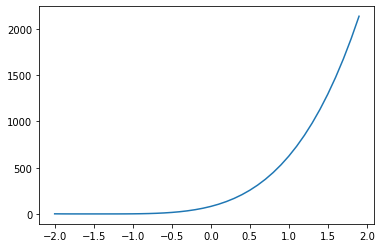

In [85]:
#if you are going to make many function evaluations for plotting,
#it's numerically faster to use lambdify
fx = lambdify(x, polynomial)
#fx is a normal function, no longer in the realm of sympy
print(type(polynomial))
print(type(fx))
#make a 1D plot
xvals = np.arange(-2,2,0.1)
plt.plot(xvals,fx(xvals))
plt.show()

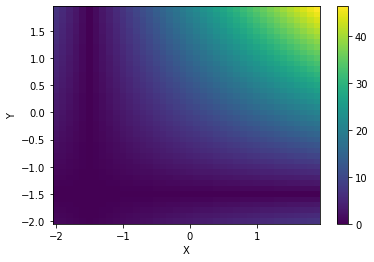

In [87]:
#Lambdify can also be used with multiple variables
fxy = lambdify((x,y), (polynomial*poly_y)**(1/4))
yvals = np.arange(-2,2,0.1)
#create a meshgrid
X, Y = np.meshgrid(xvals, yvals)
#make a 2D plot
plt.pcolormesh(X,Y,fxy(X,Y),shading='auto')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()
plt.show()